In [1]:
from bs4 import BeautifulSoup
import urllib.request
import csv

urlpage = 'http://www.fasttrack.co.uk/league-tables/tech-track-100/league-table/'
page = urllib.request.urlopen(urlpage)
soup = BeautifulSoup(page, 'html.parser')
table = soup.find('table', attrs = {
  'class': 'calendar-list'
})
results = table.find_all('tr')
print("Number of results", len(results))
rows = []
rows.append(['Rank', 'Company Name', 'Webpage', 'Description', 'Location', 'Year end', 'Annual sales rise over 3 years', 'Sales £000s', 'Staff', 'Comments'])# print(rows)
for result in results:
    data = result.find_all('td')
    if len(data) == 0:
        continue
    rank = data[0].getText()
    company = data[1].getText()
    location = data[2].getText()
    yearend = data[3].getText()
    salesrise = data[4].getText()
    sales = data[5].getText()
    staff = data[6].getText()
    comments = data[7].getText()
    companyname = data[1].find('span', attrs = {
    'class': 'company-name'
    }).getText()
    description = company.replace(companyname, '')
    sales = sales.strip('*').strip('+').replace(',', '')


    url = data[1].find('a').get('href')
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    try:
        tableRow = soup.find('table').find_all('tr')[-1]
        webpage = tableRow.find('a').get('href')
    except:
        webpage = None


    rows.append([rank, companyname, webpage, description, location, yearend, salesrise, sales, staff, comments])

print(rows)


## Create csv and write rows to output file

with open('baitap.csv','w', encoding='utf-8', newline='') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(rows)

Number of results 101
[['Rank', 'Company Name', 'Webpage', 'Description', 'Location', 'Year end', 'Annual sales rise over 3 years', 'Sales £000s', 'Staff', 'Comments'], ['1', 'Plan.com', 'http://www.plan.com', 'Communications provider', 'Isle of Man', 'Sep-17', '364.38%', '35418', '90', 'About 650 partners use its telecoms platform to support more than 100,000 UK business customers'], ['2', 'PsiOxus', 'http://www.psioxus.com', 'Biotechnology developer', 'Oxfordshire', 'Dec-17', '311.67%', '53136', '54', 'Received a $15m milestone payment from its development partner Bristol-Myers Squibb in December'], ['3', 'CensorNet', 'http://www.censornet.com', 'Cloud security software developer', 'Basingstoke', 'Dec-17', '210.17%', '7535', '77', 'Has more than 4,000 customers, including McDonald’s in France and the European Central Bank'], ['4', 'thoughtonomy', 'http://www.thoughtonomy.com', 'Automation software developer', 'East London', 'May-18', '205.20%', '16916', '100', 'It sells to 28 countri

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

dataset = pd.read_csv("baitap.csv")
dataset.head(5)

,Rank,Company Name,Webpage,Description,Location,Year end,Annual sales rise over 3 years,Sales £000s,Staff,Comments
0,1,Plan.com,http://www.plan.com,Communications provider,Isle of Man,Sep-17,364.38%,35418,90,About 650 partners use its telecoms platform t...
1,2,PsiOxus,http://www.psioxus.com,Biotechnology developer,Oxfordshire,Dec-17,311.67%,53136,54,Received a $15m milestone payment from its dev...
2,3,CensorNet,http://www.censornet.com,Cloud security software developer,Basingstoke,Dec-17,210.17%,7535,77,"Has more than 4,000 customers, including McDon..."
3,4,thoughtonomy,http://www.thoughtonomy.com,Automation software developer,East London,May-18,205.20%,16916,100,It sells to 28 countries and 50% of revenue is...
4,5,Perkbox,http://www.perkbox.com,Employee engagement services,Central London,Dec-17,204.12%,34700,200,Acquired software platform Loyalty Bay for an ...


In [6]:
dataset['Annual sales rise over 3 years'] = dataset['Annual sales rise over 3 years'].str.strip('%')
dataset.sample(5)

,Rank,Company Name,Webpage,Description,Location,Year end,Annual sales rise over 3 years,Sales £000s,Staff,Comments
7,8,goHenry,http://www.gohenry.co.uk,Children's pre-paid card developer,Central London,Dec-17,200.87,6116,61,The company is named after the first child to ...
26,27,GoCardless,http://www.gocardless.com,Payment services provider,Central London,Dec-17,112.99,11896,165,International expansion plans include targetin...
23,24,TransferWise,http://www.transferwise.com,Currency transfer provider,East London,Mar-18,129.39,117283,1000,Was valued at $1.6bn in November after it rais...
57,58,Tech21,http://www.tech21.com,Device impact protection maker,Southwest London,May-17,75.34,121576,81,Became an inaugural member of Google’s certifi...
68,69,Amplience,http://www.amplience.com,Digital media technology,Central London,Jun-17,66.25,8147,85,Helps retailers such as Argos and Mulberry to ...


In [5]:
dataset.to_csv("data.csv", index = False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
color = sns.color_palette()

df = pd.read_csv("data.csv")
df.head(5)

,Rank,Company Name,Webpage,Description,Location,Year end,Annual sales rise over 3 years,Sales £000s,Staff,Comments
0,1,Plan.com,http://www.plan.com,Communications provider,Isle of Man,Sep-17,364.38,35418,90,About 650 partners use its telecoms platform t...
1,2,PsiOxus,http://www.psioxus.com,Biotechnology developer,Oxfordshire,Dec-17,311.67,53136,54,Received a $15m milestone payment from its dev...
2,3,CensorNet,http://www.censornet.com,Cloud security software developer,Basingstoke,Dec-17,210.17,7535,77,"Has more than 4,000 customers, including McDon..."
3,4,thoughtonomy,http://www.thoughtonomy.com,Automation software developer,East London,May-18,205.20,16916,100,It sells to 28 countries and 50% of revenue is...
4,5,Perkbox,http://www.perkbox.com,Employee engagement services,Central London,Dec-17,204.12,34700,200,Acquired software platform Loyalty Bay for an ...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
Rank                              100 non-null int64
Company Name                      100 non-null object
Webpage                           100 non-null object
Description                       100 non-null object
Location                          100 non-null object
Year end                          100 non-null object
Annual sales rise over 3 years    100 non-null float64
Sales £000s                       100 non-null object
Staff                             100 non-null object
Comments                          100 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 7.9+ KB


In [3]:
df['Location'].value_counts().head(15)

Central London    36
West London        8
East London        8
Manchester         6
Cambridge          4
Nottingham         3
Oxfordshire        3
Edinburgh          2
Hull               2
South London       2
North London       2
Swansea            2
Basingstoke        1
Watford            1
Cheshire           1
Name: Location, dtype: int64

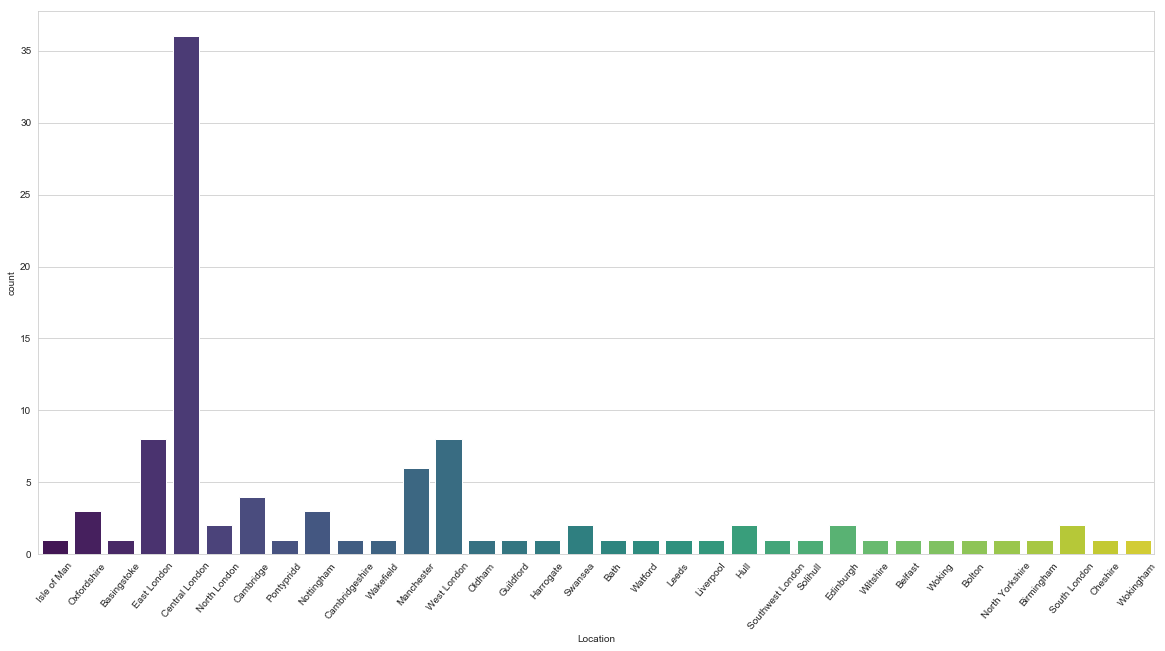

In [4]:
plt.figure(figsize=(20,10))
sns.countplot(x='Location',data=df,palette='viridis');
plt.xticks(rotation=50);